# **Exploratory Data Analysis - RSNA Screening Mammography Dataset (Breast Cancer Detection Competition)**

## **Introduction**
The goal of this competition, as outlined in the "[Desciption](https://www.kaggle.com/competitions/rsna-breast-cancer-detection)", is to assist the Radiological Society of North America (**RSNA**) in increasing access to early breast cancer detection, with the aim of reducing breast cancer mortality worldwide. In this notebook, we will examine and analyze the dataset provided for this competition.


In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

%matplotlib inline
from matplotlib import cm, dates
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FuncFormatter

In [2]:
# Visualisation args
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
barcolors = ['#87B88C','#9ED2A1','#E7E8CB','#48A0C9','#2A58A1','#2E8B55','#DF3659','Grey']
barstyle = {"edgecolor":"black", "linewidth":1}
heatmap1_args = dict(annot=True, fmt='.0f', square=False, cmap=cm.get_cmap("RdGy", 10), center = 90, vmin=0, vmax=10000, lw=4, cbar=False)
heatmap2_args = dict(annot=True, fmt='.3f', square=False, cmap="Greens", center = 0.5, lw=4, cbar=False)
heatmap3_args = dict(annot=True, fmt='.0f', square=False, cmap=cmap, center = 9200, lw=4, cbar=False)

def hide_axes(this_ax):
    this_ax.set_frame_on(False)
    this_ax.set_xticks([])
    this_ax.set_yticks([])
    return this_ax

def draw_heatmap1(df,this_ax):
    hm = sns.heatmap(df, ax = this_ax, **heatmap1_args)
    this_ax.set_yticklabels(this_ax.get_yticklabels(), rotation=0)
    this_ax.yaxis.tick_right()
    this_ax.yaxis.set_label_position("right")
    for axis in ['top','bottom','left','right']:
        this_ax.spines[axis].set_visible(True)
        this_ax.spines[axis].set_color('black')
    return hm 

def draw_heatmap2(df,this_ax):
    hm = sns.heatmap(df, ax = this_ax, **heatmap2_args)
    this_ax.set_yticklabels(this_ax.get_yticklabels(), rotation=0)
    this_ax.yaxis.tick_right()
    this_ax.yaxis.set_label_position("right")
    for axis in ['top','bottom','left','right']:
        this_ax.spines[axis].set_visible(True)
        this_ax.spines[axis].set_color('black')
    return hm 

def draw_heatmap3(df,this_ax):
    hm = sns.heatmap(df, ax = this_ax, **heatmap3_args)
    this_ax.set_yticklabels(this_ax.get_yticklabels(), rotation=0)
    this_ax.yaxis.tick_right()
    this_ax.yaxis.set_label_position("right")
    for axis in ['top','bottom','left','right']:
        this_ax.spines[axis].set_visible(True)
        this_ax.spines[axis].set_color('black')
    return hm 

def thousands1(x, pos):
    'The two args are the value and tick position'
    return '%1.0fK' % (x * 1e-3)

formatterK1 = FuncFormatter(thousands1)

def thousands2(x, pos):
    'The two args are the value and tick position'
    return '%1.1fK' % (x * 1e-3)

formatterK2 = FuncFormatter(thousands2)

## **1. Exploration**
We will begin with basic exploration of the the training `csv` file, print the number of rows and columns in the dataframe as well as show the first 5 rows.

In [3]:
train_df = pd.read_csv("/kaggle/input/rsna-breast-cancer-detection/train.csv")
print(f'There are {train_df.shape[0]} rows and {train_df.shape[1]} columns in this data frame')
train_df.head(10)

There are 54706 rows and 14 columns in this data frame


,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False
3,2,10006,1874946579,R,CC,61.0,0,0,0,NaN,0,NaN,29,False
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,NaN,21,True
5,2,10011,270344397,L,MLO,55.0,0,0,0,0.0,0,NaN,21,True
6,2,10011,541722628,R,CC,55.0,0,0,0,NaN,0,NaN,21,False
7,2,10011,1031443799,R,MLO,55.0,0,0,0,NaN,0,NaN,21,False
8,2,10025,562340703,L,CC,75.0,0,0,0,NaN,0,NaN,29,False
9,2,10025,1365269360,L,MLO,75.0,0,0,0,NaN,0,NaN,29,False


In [4]:
test=train_df.dropna()

In [5]:
test.density.unique()

array(['C', 'D', 'B', 'A'], dtype=object)

A brief review of each of the columns shows that each patient seems to have multiple images taken, the orientations of the image taken indicated by columns `laterality` / `view` , the diagnose given in columns `cancer`,`biopsy`,`invasive` are related to the specific images referenced in column `image_id` and the related patient in column `patient_id`.

## **1.1 Further Data Check**
In this section we will check for `null`, `unique` and `duplicated` values will allow for better understanding of the data held within the subject `csv` file.

There is a total of 0 duplicated rows


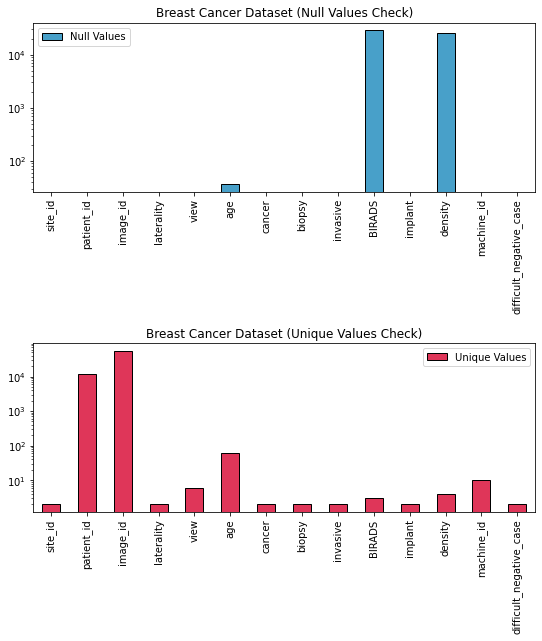

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
Null Values,0,0,0,0,0,37,0,0,0,28420,0,25236,0,0
Unique Values,2,11913,54706,2,6,63,2,2,2,3,2,4,10,2


In [6]:
# Duplicate Values
print(f"There is a total of {train_df.duplicated().replace({True:1,False:0}).sum()} duplicated rows")

# Create seperate dataframe for null values and unique values
na_vals=pd.DataFrame({'Null Values':train_df.isna().sum()})
unique_vals=pd.DataFrame({'Unique Values':train_df.nunique()})

# Visualisation 
fig, ax=plt.subplots(2,1, figsize=(9,9), gridspec_kw={'hspace':0.9})
na_vals.plot.bar(color=barcolors[3], **barstyle, ax=ax[0])
ax[0].set_title('Breast Cancer Dataset (Null Values Check)')
ax[0].set_facecolor("white")
ax[0].set_yscale('log')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)

unique_vals.plot.bar(color=barcolors[6], **barstyle, ax=ax[1])
ax[1].set_title('Breast Cancer Dataset (Unique Values Check)')
ax[1].set_facecolor("white")
ax[1].set_yscale('log')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
plt.show()

# Print dataframes
pd.concat([na_vals, unique_vals], axis=1).T

Columns `age`, `BIRADS` and `density` contain null values with the most significant numbers in the later two mentioned columns. 

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_ones_zeros(df, col1, col2, number):
    # Get the unique values in col2
    unique_values = df[col2].unique()
    
    # Set up the plot
    fig, ax = plt.subplots(figsize=(9, 4))
    ax.set_xlabel(col2)
    ax.set_ylabel('Count')
    ax.set_title(f'Breast Cancer Dataset (Data Imbalance Check #{number})')
    
    # Create a bar plot for each value in col2
    for i, value in enumerate(unique_values):
        # Count the number of 1s and 0s in col1 where col2 is equal to the current value
        ones = df[(df[col1] == 1) & (df[col2] == value)].shape[0]
        zeros = df[(df[col1] == 0) & (df[col2] == value)].shape[0]
        
        # Plot the bars
        ax.bar(i-0.2, ones, 0.4, color = barcolors[1], **barstyle,)
        ax.bar(i+0.2, zeros, 0.4, color = barcolors[2], **barstyle,)
    
    # Add a legend
    ax.legend(['postive', 'negative'])
    
    # Show the plot
    plt.xticks(range(len(unique_values)), unique_values)
    plt.show()
    
def plot_ones_zeros_ratio(df, col1, col2, number):
    # Get the unique values in col2
    unique_values = df[col2].unique()
    
    # Set up the plot
    fig, ax = plt.subplots(figsize=(9, 4))
    ax.set_xlabel(col2)
    ax.set_ylabel('Percentage')
    ax.set_title(f'Breast Cancer Dataset (Data Imbalance Check #{number})')
    
    # Create a bar plot for each value in col2
    for i, value in enumerate(unique_values):
        # Count the number of 1s and 0s in col1 where col2 is equal to the current value
        ones = df[(df[col1] == 1) & (df[col2] == value)].shape[0]
        zeros = df[(df[col1] == 0) & (df[col2] == value)].shape[0]
        ratio = ones/zeros
        
        # Plot the bars
        ax.bar(i, ones/zeros, 0.4, color = barcolors[4], **barstyle,)
        
        # Add the values for each bar
        ax.text(i, ones/zeros, f'{ones/zeros:.3f}', ha='center', va='bottom', fontweight='bold')
    
    # Add a legend
    ax.legend(['ratio'])
    
    # Show the plot
    plt.xticks(range(len(unique_values)), unique_values)
    plt.show()

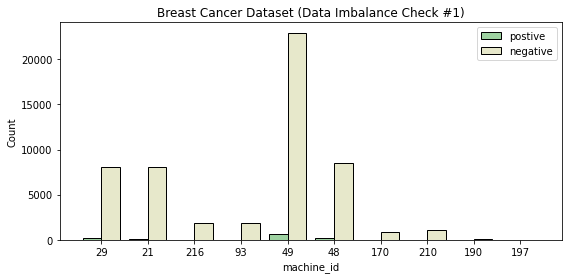

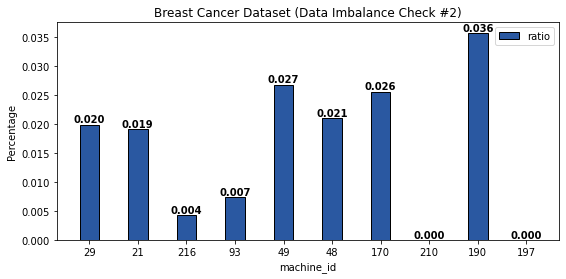

In [8]:
plot_ones_zeros(train_df, 'cancer', 'machine_id',1)
plot_ones_zeros_ratio(train_df, 'cancer', 'machine_id',2)

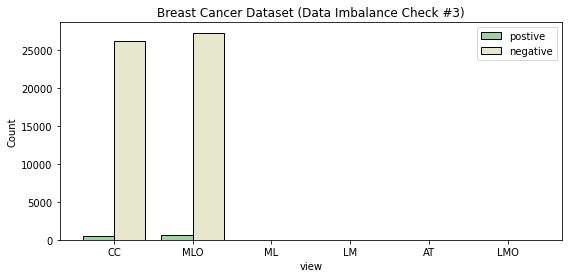

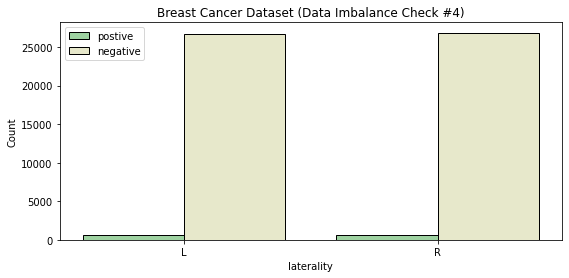

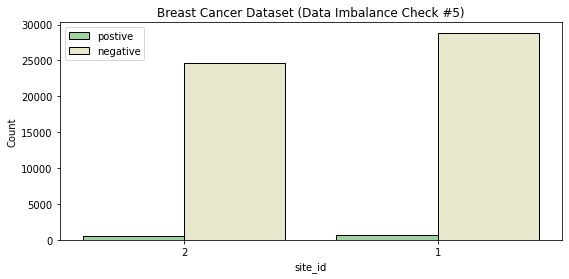

In [9]:
plot_ones_zeros(train_df, 'cancer', 'view',3)
plot_ones_zeros(train_df, 'cancer', 'laterality',4)
plot_ones_zeros(train_df, 'cancer', 'site_id',5)

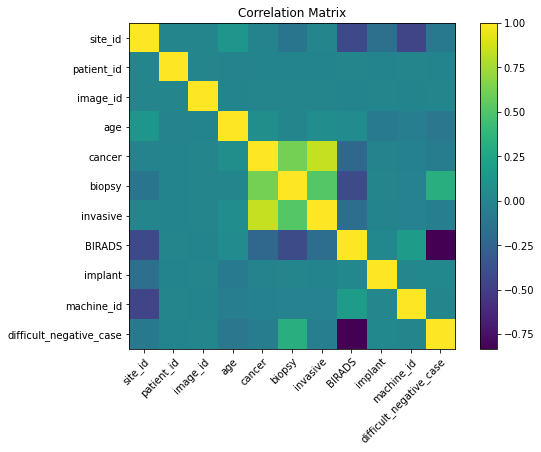

In [10]:
# Calculate the correlations between the columns
corr = train_df.corr()

# Set up the plot
fig, ax = plt.subplots(figsize=(9, 6))
ax.set_title('Correlation Matrix')

# Create a heatmap from the correlations
im = ax.imshow(corr)

# Add a colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set the labels for the x and y ticks
ax.set_xticks(range(len(corr)))
ax.set_yticks(range(len(corr)))
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)

# Rotate the x labels to avoid overlapping
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Show the plot
plt.show()

In [11]:
train_df[(train_df['cancer'] == 1) & (train_df['site_id'])]

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
87,1,10130,388811999,L,MLO,71.0,1,1,1,0.0,0,B,49,False
88,1,10130,613462606,L,CC,71.0,1,1,1,0.0,0,B,49,False
89,1,10130,1360338805,L,CC,71.0,1,1,1,0.0,0,B,49,False
90,1,10130,1672636630,L,MLO,71.0,1,1,1,0.0,0,B,49,False
190,1,10226,461614796,L,MLO,71.0,1,1,1,0.0,0,C,49,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54289,1,9481,1448380165,L,CC,64.0,1,1,1,0.0,0,C,49,False
54290,1,9481,1662311140,L,CC,64.0,1,1,1,0.0,0,C,49,False
54350,1,9559,203061242,L,CC,76.0,1,1,1,0.0,0,B,49,False
54351,1,9559,1047452753,L,MLO,76.0,1,1,1,0.0,0,B,49,False


In [12]:
sites_df=train_df[['site_id','cancer']]
sites=pd.DataFrame(sites_df.groupby(['site_id'])['cancer'].sum().sort_values(ascending=False))
sites=sites.reset_index()
sitelst=sites.site_id.to_list()

In [13]:
sites_df=train_df[['site_id','cancer']]
sites=pd.DataFrame(sites_df.groupby(['site_id'])['cancer'].sum().sort_values(ascending=False))
sites=sites.reset_index()
sitelst=sites.site_id.to_list()

source_df=pd.concat([tweets_biden[['source','tweet','country']].copy(),tweets_trump[['source','tweet','country']].copy()])
source_df['country'].replace({'United States of America':'United States'}, inplace=True)
source_df=source_df.fillna('Geo Data NA')
source_df=source_df.drop_duplicates()

sources=pd.DataFrame(source_df.groupby(['source'])['tweet'].count().sort_values(ascending=False)[:6])
sources=sources.reset_index()
sourceslst=sources.source.to_list()

country=pd.DataFrame(source_df.groupby(['country'])['tweet'].count().sort_values(ascending=False)[:6])
country=country.reset_index()
countrylst=country.country.to_list()

platXtab=pd.DataFrame(source_df.groupby(['source','country'])['tweet'].count().unstack().fillna(0))

fig, ax=plt.subplots(2,2, figsize=(9,9), 
                     gridspec_kw={'height_ratios':[2,5], 'width_ratios':[2,5], 'wspace':0.1, 'hspace':0.1})

hide_ax = ax[0,0]
hide_axes(hide_ax)

hm_ax = ax[1,1]
draw_heatmap1(platXtab.loc[sourceslst,countrylst], hm_ax)
hm_ax.set_xlabel('tweets country of origin')
hm_ax.set_ylabel('platform used for tweets')
hm_ax.set_yticklabels(('Twitter Web','iPhone','Android','iPad','TweetDeck','Hootsuite'), rotation=0) 

bar_ax = ax[0,1]
platXtab.loc[sourceslst,countrylst].sum().plot.bar(ax=bar_ax, color=barcolors[1],**barstyle)
bar_ax.set_xlabel(bar_ax.get_xlabel())
bar_ax.xaxis.tick_top()
bar_ax.xaxis.set_label_position("top")
bar_ax.yaxis.set_major_formatter(formatterK1)
bar_ax.set_xticklabels(('NA', 'US', 'UK', 'CAN', 'GE','FRA'), rotation=0) 
bar_ax.set_xlabel('')
bar_ax.set_ylabel('# tweets')

barh_ax = ax[1,0]
platXtab.loc[sourceslst,countrylst].sum(axis=1)[::-1].plot.barh(ax=barh_ax, color=barcolors[2],**barstyle)
barh_ax.yaxis.set_label_position("left")
barh_ax.xaxis.tick_top()
barh_ax.xaxis.set_label_position("top")
barh_ax.xaxis.set_major_formatter(formatterK1)
barh_ax.set_xlim(barh_ax.get_xlim()[::-1])
barh_ax.set_yticklabels(('Hootsuite','TweetDeck','iPad','Android','iPhone','Twitter Web'), rotation=0) 
barh_ax.set_xlabel('# tweets')
barh_ax.set_ylabel('')
plt.show()